# Data Scaling

## 1. Feature Scaling

## 1.1. Normalization

In [5]:
setwd("d:/Fldr/Repos/edu-r/DM")

<center>$X' = \frac{X-X_{min}}{X_{max} - X_{min}}$</center>

In [94]:
data <- read.csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
head(data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [9]:
str(data)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes"

In [11]:
summary(data$TotalCharges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   18.8   401.4  1397.5  2283.3  3794.7  8684.8      11 

In [13]:
library(ggplot2)

Warning message:
"Removed 11 rows containing non-finite values (`stat_bin()`)."


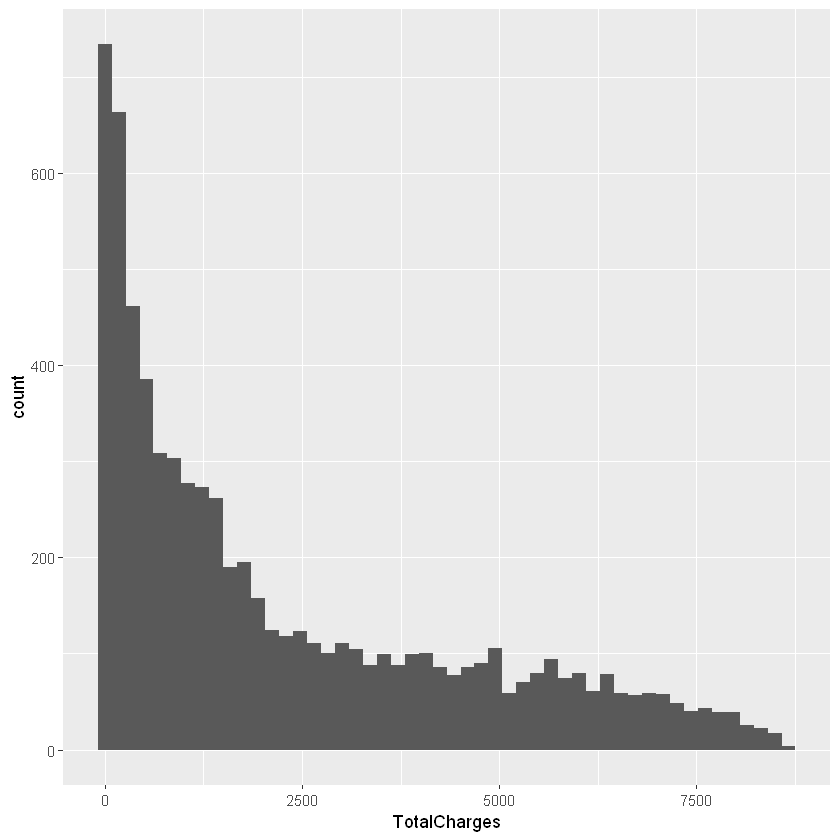

In [22]:
ggplot(data = data, aes(x = TotalCharges)) +
    geom_histogram(bins = 50)

In [25]:
library(dplyr)
data <- data |>
    mutate(TotalCharges = ifelse(is.na(TotalCharges), 0, TotalCharges))
summary(data$TotalCharges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   398.6  1394.5  2279.7  3786.6  8684.8 

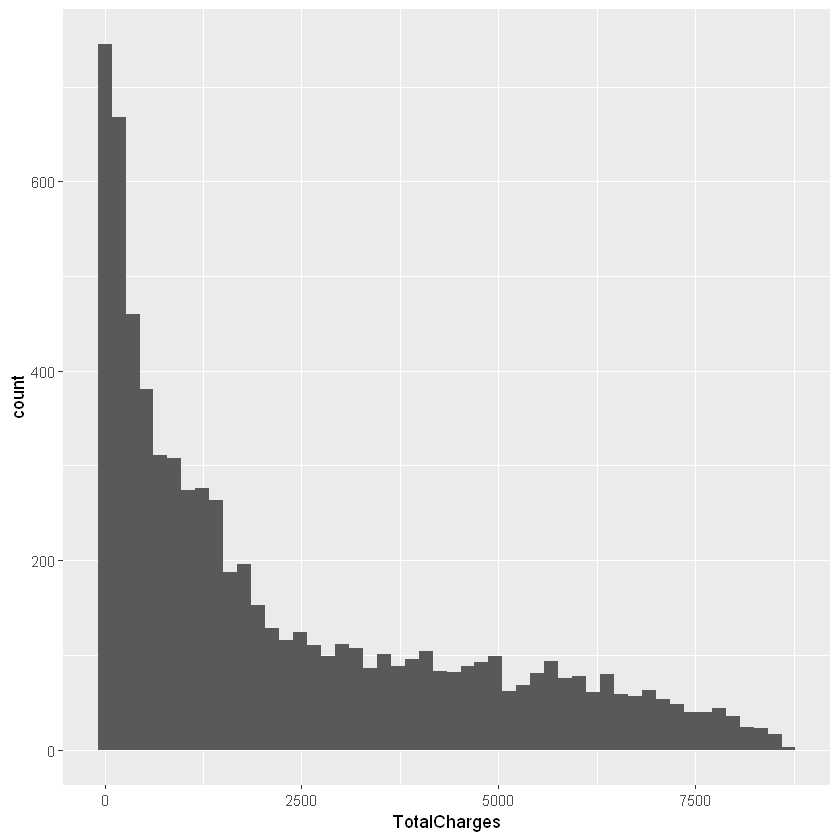

In [27]:
ggplot(data = data, aes(x = TotalCharges)) +
    geom_histogram(bins = 50)

In [33]:
normalizeFunc <- function(x) {
    return ((x - min(x))/(max(x) - min(x)))
}

In [35]:
data <- data |>
    mutate(TotalNorm = normalizeFunc(TotalCharges))
data |>
 select(TotalCharges, TotalNorm) |>
 head()

,TotalCharges,TotalNorm
,<dbl>,<dbl>
1,29.85,0.003437039
2,1889.50,0.217564020
3,108.15,0.012452791
4,1840.75,0.211950765
5,151.65,0.017461542
6,820.50,0.094475405


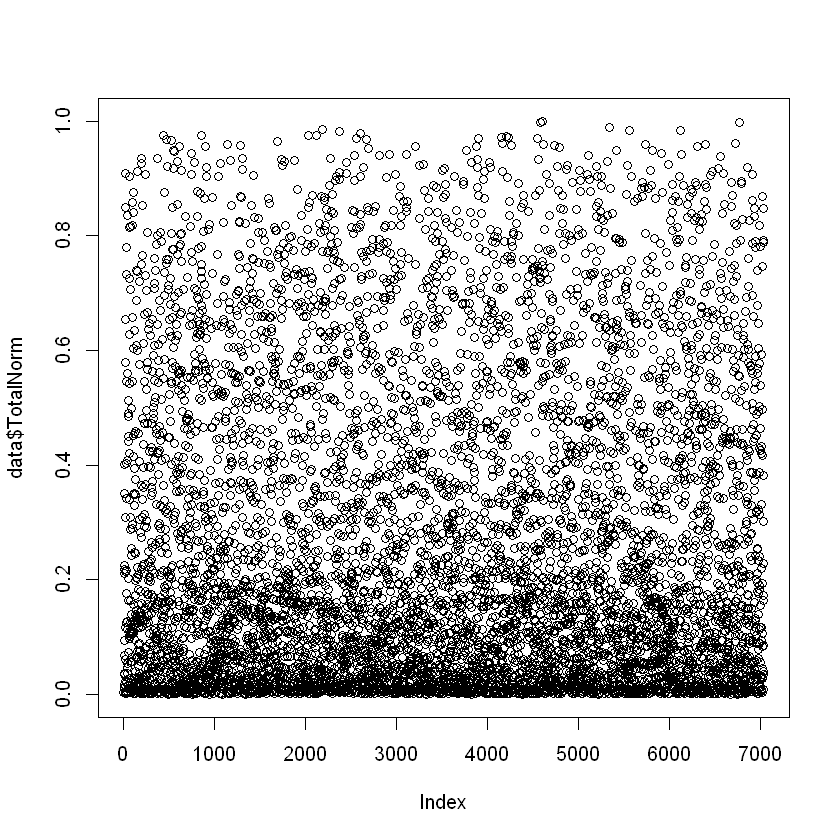

In [36]:
plot(data$TotalNorm)

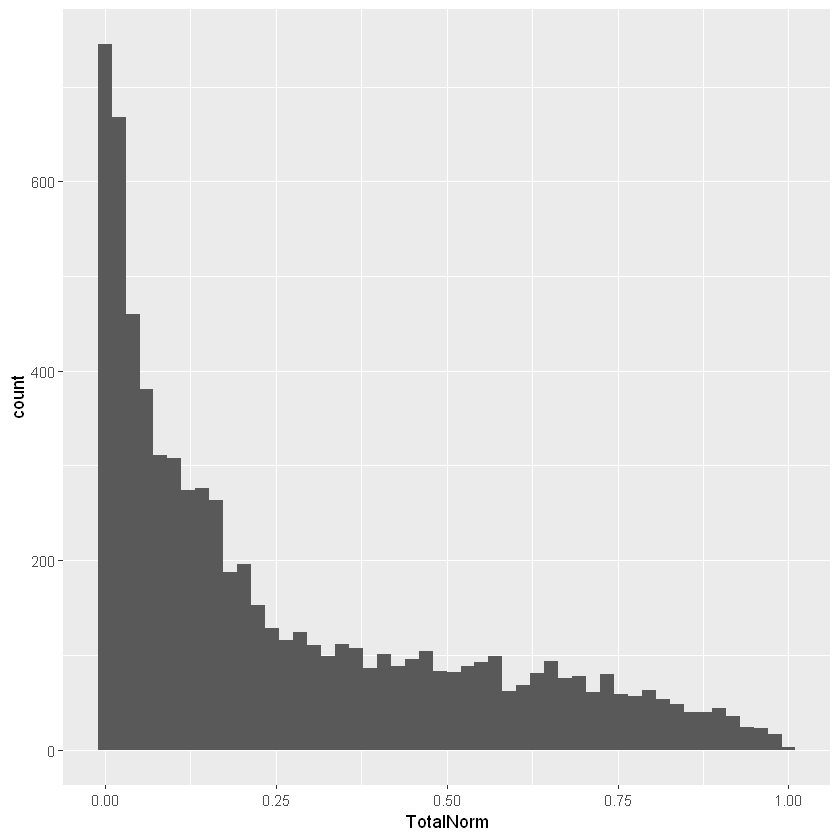

In [38]:
ggplot(data = data, aes(x = TotalNorm)) +
    geom_histogram(bins = 50)

## 1.2. Standartization

<center>$X' = \frac{X-\mu}{\sigma}$</center>

In [41]:
standartize <- function(data) {    
    sdev = sd(data, na.rm = TRUE)  
    data <- (data - mean(data, na.rm = T)) / sdev
    return (data)    
}

In [43]:
data <- data |>
    mutate(TotalStand = standartize(TotalCharges))
data |>
 select(TotalCharges, TotalNorm, TotalStand) |>
 head()

,TotalCharges,TotalNorm,TotalStand
,<dbl>,<dbl>,<dbl>
1,29.85,0.003437039,-0.9925401
2,1889.50,0.217564020,-0.1721525
3,108.15,0.012452791,-0.9579979
4,1840.75,0.211950765,-0.1936586
5,151.65,0.017461542,-0.9388078
6,820.50,0.094475405,-0.6437435


In [45]:
#install.packages("gridExtra")

In [47]:
library(gridExtra)

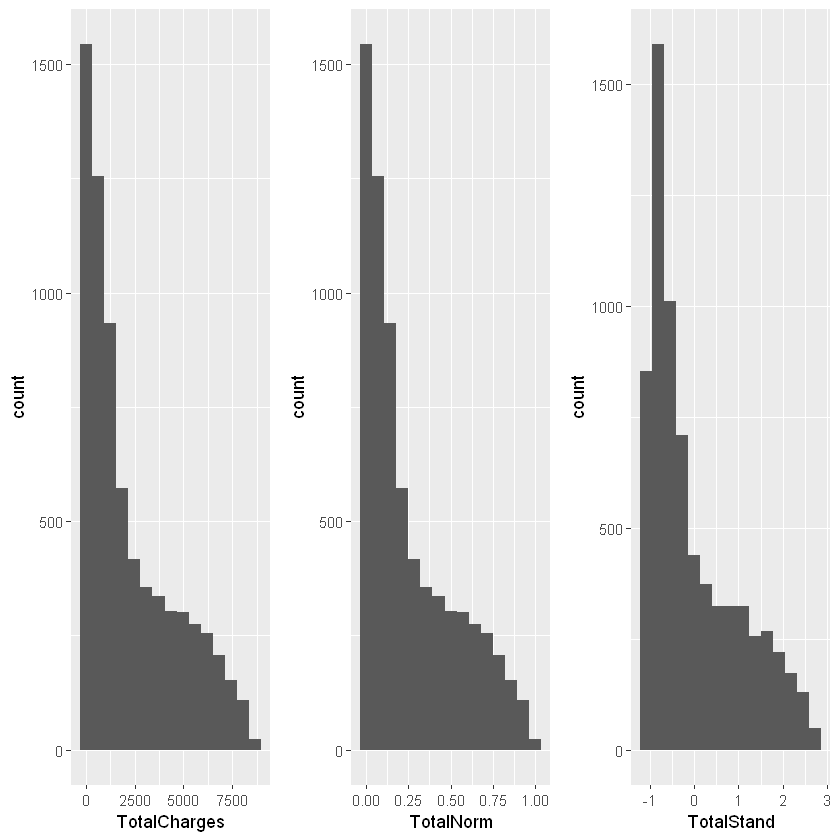

In [51]:
p1 <- ggplot(data = data, aes(x = TotalCharges)) +
        geom_histogram(bins = 15)
p2 <- ggplot(data = data, aes(x = TotalNorm)) +
        geom_histogram(bins = 15)
p3 <- ggplot(data = data, aes(x = TotalStand)) +
        geom_histogram(bins = 15)

grid.arrange(p1, p2, p3, ncol = 3)

1.3. `Scale` function

In [60]:
scaled_charges <- scale(data$TotalCharges,
                        center = mean(data$TotalCharges),
                        scale = sd(data$TotalCharges))

In [62]:
scaled_charges

-0.9925401
-0.1721525
-0.9579979
-0.1936586
-0.9388078
-0.6437435
-0.1457275
-0.8725248
0.3380614
0.5330063
-0.7465539


Warning message:
"Removed 11 rows containing non-finite values (`stat_bin()`)."
Warning message:
"Removed 11 rows containing non-finite values (`stat_bin()`)."


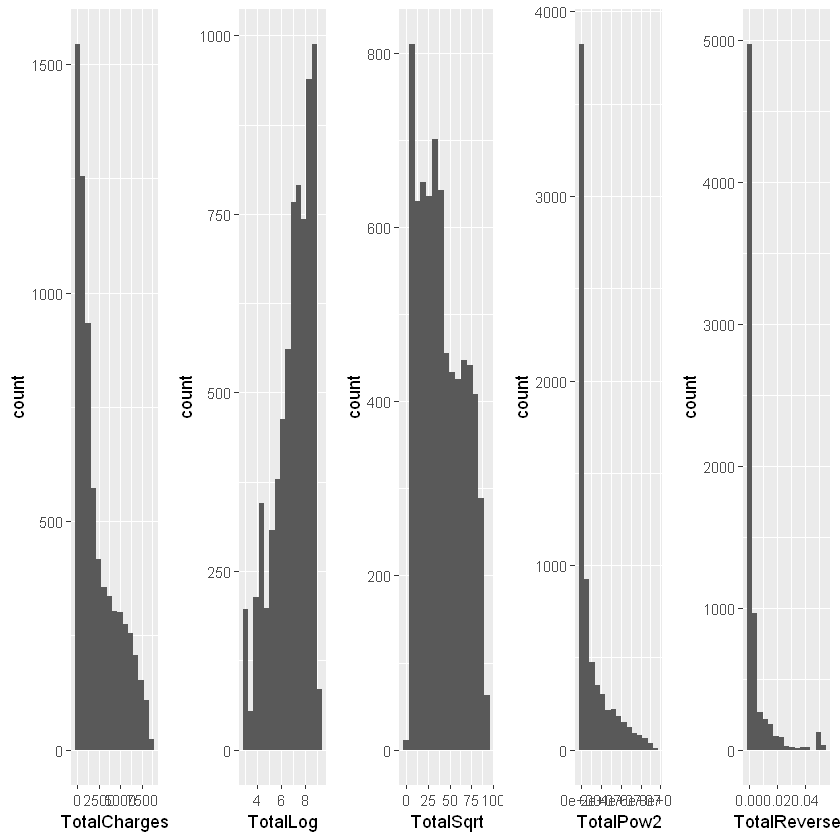

In [67]:
data_tmp <- data |>
    mutate(TotalLog = log(TotalCharges),
           TotalSqrt = sqrt(TotalCharges),
           TotalPow2 = TotalCharges^2,
        TotalReverse = 1/TotalCharges)

p1 <- ggplot(data = data_tmp, aes(x = TotalCharges)) +
        geom_histogram(bins = 15)
p2 <- ggplot(data =data_tmp, aes(x = TotalLog)) +
        geom_histogram(bins = 15)
p3 <- ggplot(data = data_tmp, aes(x = TotalSqrt)) +
        geom_histogram(bins = 15)
p4 <- ggplot(data = data_tmp, aes(x = TotalPow2)) +
        geom_histogram(bins = 15)
p5 <- ggplot(data = data_tmp, aes(x = TotalReverse)) +
        geom_histogram(bins = 15)

grid.arrange(p1, p2, p3, p4, p5, ncol = 5)

In [69]:
data |>
    select(MonthlyCharges, TotalCharges) |>
    head(6)

,MonthlyCharges,TotalCharges
,<dbl>,<dbl>
1,29.85,29.85
2,56.95,1889.50
3,53.85,108.15
4,42.30,1840.75
5,70.70,151.65
6,99.65,820.50


In [71]:
data <- data |>
    mutate(M2T = round(MonthlyCharges/TotalCharges, 2))
data |>
    select(MonthlyCharges, TotalCharges, M2T) |>
    head(6)

,MonthlyCharges,TotalCharges,M2T
,<dbl>,<dbl>,<dbl>
1,29.85,29.85,1.00
2,56.95,1889.50,0.03
3,53.85,108.15,0.50
4,42.30,1840.75,0.02
5,70.70,151.65,0.47
6,99.65,820.50,0.12


1.4. Labeling

In [73]:
data |> head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalNorm,TotalStand,M2T
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.003437039,-0.9925401,1.00
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,0.217564020,-0.1721525,0.03
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.012452791,-0.9579979,0.50
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.211950765,-0.1936586,0.02
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.017461542,-0.9388078,0.47
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0.094475405,-0.6437435,0.12


In [77]:
data <- data |>
    mutate(InternetService = as.factor(InternetService))
str(data)

'data.frame':	7043 obs. of  24 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" .

## 1.5. One Hot encoding

In [95]:
data1 <- data |>
    select(gender, InternetService, TotalCharges, Churn)
data1 |> head()

,gender,InternetService,TotalCharges,Churn
,<chr>,<chr>,<dbl>,<chr>
1,Female,DSL,29.85,No
2,Male,DSL,1889.50,No
3,Male,DSL,108.15,Yes
4,Male,DSL,1840.75,No
5,Female,Fiber optic,151.65,Yes
6,Female,Fiber optic,820.50,Yes


In [96]:
unique(data$gender)

[1] "Female" "Male"

In [85]:
table(data$gender)


Female   Male 
  3488   3555 

In [88]:
library(gmodels)
CrossTable(data$gender)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  7043 

 
          |    Female |      Male | 
          |-----------|-----------|
          |      3488 |      3555 | 
          |     0.495 |     0.505 | 
          |-----------|-----------|



 


In [98]:
data1 <- data1 |>
    mutate(gender = ifelse(gender == "Male", 1, 0),
          Churn = ifelse(Churn == "Yes", 0, 1))
data1 |> head()

,gender,InternetService,TotalCharges,Churn
,<dbl>,<chr>,<dbl>,<dbl>
1,0,DSL,29.85,1
2,0,DSL,1889.50,1
3,0,DSL,108.15,1
4,0,DSL,1840.75,1
5,0,Fiber optic,151.65,1
6,0,Fiber optic,820.50,1


In [100]:
CrossTable(data$InternetService)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  7043 

 
            |         DSL | Fiber optic |          No | 
            |-------------|-------------|-------------|
            |        2421 |        3096 |        1526 | 
            |       0.344 |       0.440 |       0.217 | 
            |-------------|-------------|-------------|



 


In [102]:
library(caret)

In [107]:
dummy <- dummyVars("~ InternetService", data = data1)

In [109]:
head(data1)

,gender,InternetService,TotalCharges,Churn
,<dbl>,<chr>,<dbl>,<dbl>
1,0,DSL,29.85,1
2,0,DSL,1889.50,1
3,0,DSL,108.15,1
4,0,DSL,1840.75,1
5,0,Fiber optic,151.65,1
6,0,Fiber optic,820.50,1


In [111]:
predict(dummy, newdata = data1)

,InternetServiceDSL,InternetServiceFiber optic,InternetServiceNo
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,1,0,0
9,0,1,0
10,1,0,0


In [120]:
ncol(data)

[1] 21

In [121]:
dummy <- dummyVars(" ~. -customerID", data = data)
new_df <- data.frame(predict(dummy, newdata = data)) # precit dummy variables and
new_df %>% head()

,genderFemale,genderMale,SeniorCitizen,PartnerNo,PartnerYes,DependentsNo,DependentsYes,tenure,PhoneServiceNo,PhoneServiceYes,...,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank.transfer..automatic.,PaymentMethodCredit.card..automatic.,PaymentMethodElectronic.check,PaymentMethodMailed.check,MonthlyCharges,TotalCharges,ChurnNo,ChurnYes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,1,1,0,1,1,0,...,0,1,0,0,1,0,29.85,29.85,1,0
2,0,1,0,1,0,1,0,34,0,1,...,1,0,0,0,0,1,56.95,1889.50,1,0
3,0,1,0,1,0,1,0,2,0,1,...,0,1,0,0,0,1,53.85,108.15,0,1
4,0,1,0,1,0,1,0,45,1,0,...,1,0,1,0,0,0,42.30,1840.75,1,0
5,1,0,0,1,0,1,0,2,0,1,...,0,1,0,0,1,0,70.70,151.65,0,1
6,1,0,0,1,0,1,0,8,0,1,...,0,1,0,0,1,0,99.65,820.50,0,1


In [123]:
ncol(new_df)

[1] 47

## Histogram

In [136]:
data <- read.csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
str(data)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : chr  "7590-VHVEG" "5575-GNVDE" "3668-QPYBK" "7795-CFOCW" ...
 $ gender          : chr  "Female" "Male" "Male" "Male" ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : chr  "Yes" "No" "No" "No" ...
 $ Dependents      : chr  "No" "No" "No" "No" ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : chr  "No" "Yes" "Yes" "No" ...
 $ MultipleLines   : chr  "No phone service" "No" "No" "No phone service" ...
 $ InternetService : chr  "DSL" "DSL" "DSL" "DSL" ...
 $ OnlineSecurity  : chr  "No" "Yes" "Yes" "Yes" ...
 $ OnlineBackup    : chr  "Yes" "No" "Yes" "No" ...
 $ DeviceProtection: chr  "No" "Yes" "No" "Yes" ...
 $ TechSupport     : chr  "No" "No" "No" "Yes" ...
 $ StreamingTV     : chr  "No" "No" "No" "No" ...
 $ StreamingMovies : chr  "No" "No" "No" "No" ...
 $ Contract        : chr  "Month-to-month" "One year" "Month-to-month" "One year" ...
 $ PaperlessBilling: chr  "Yes"

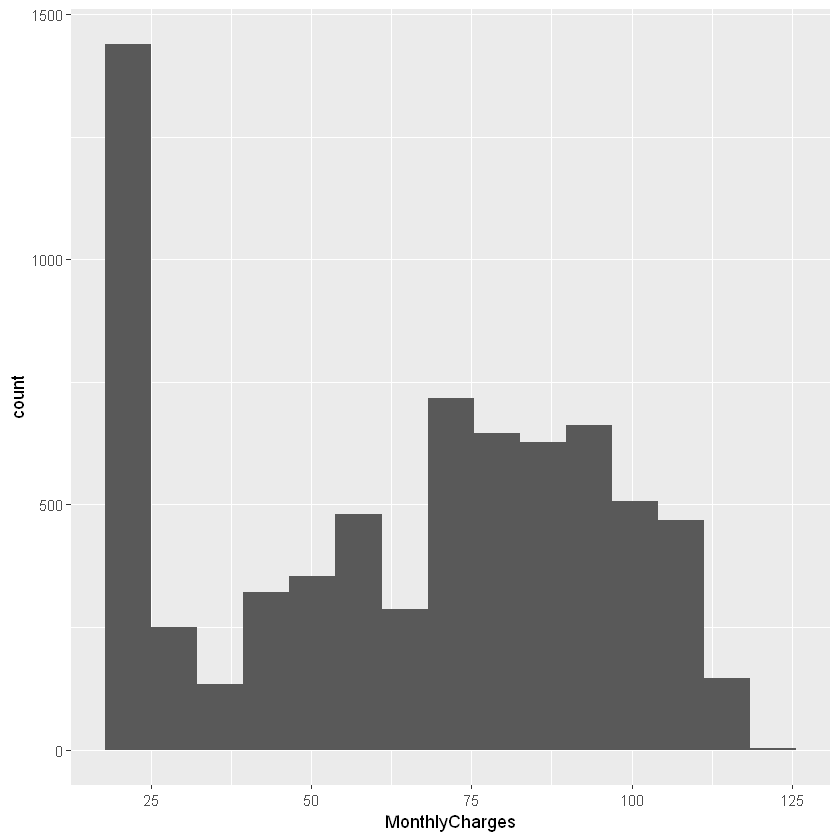

In [138]:
hist <- ggplot(data, aes(x = MonthlyCharges)) +
     geom_histogram(bins = 15)
hist

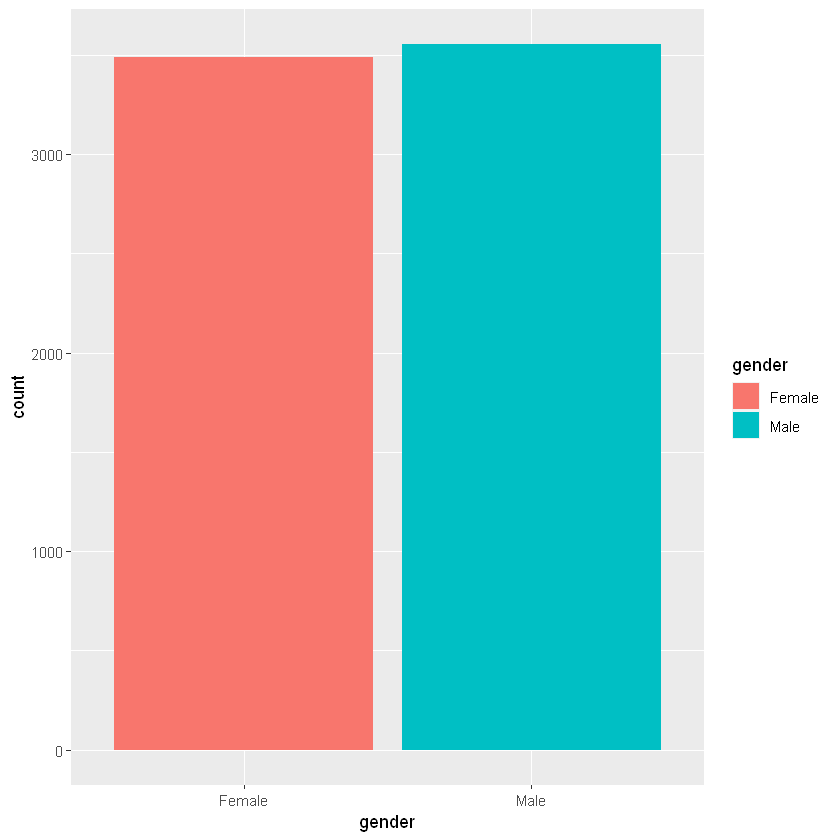

In [141]:
bar <- ggplot(data, aes(x = gender, fill=gender)) +
     geom_bar()
bar

Warning message:
"Removed 11 rows containing non-finite values (`stat_boxplot()`)."


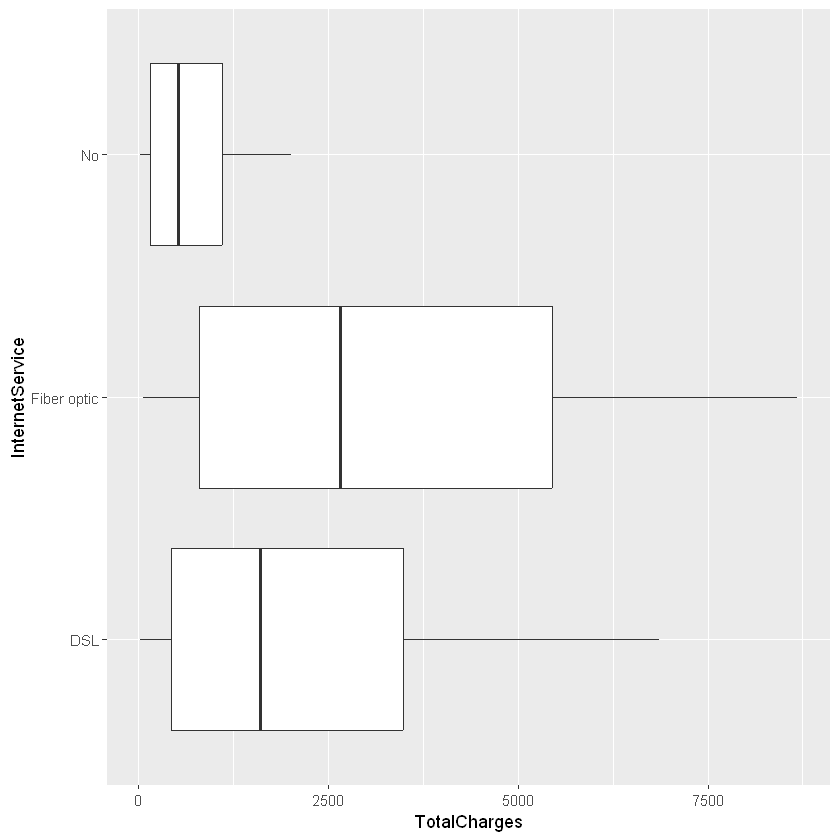

In [147]:
ggplot(data, aes(TotalCharges, InternetService)) + geom_boxplot()

In [149]:
library(Hmisc)

In [152]:
describe(data)

data 

 21  Variables      7043  Observations
--------------------------------------------------------------------------------
customerID 
       n  missing distinct 
    7043        0     7043 

lowest : 0002-ORFBO 0003-MKNFE 0004-TLHLJ 0011-IGKFF 0013-EXCHZ
highest: 9987-LUTYD 9992-RRAMN 9992-UJOEL 9993-LHIEB 9995-HOTOH
--------------------------------------------------------------------------------
gender 
       n  missing distinct 
    7043        0        2 
                        
Value      Female   Male
Frequency    3488   3555
Proportion  0.495  0.505
--------------------------------------------------------------------------------
SeniorCitizen 
       n  missing distinct     Info      Sum     Mean      Gmd 
    7043        0        2    0.408     1142   0.1621   0.2717 

--------------------------------------------------------------------------------
Partner 
       n  missing distinct 
    7043        0        2 
                      
Value         No   Yes
Frequency   36

In [156]:
library(psych)

In [157]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
customerID*,1,7043,3522.0000000,2033.2833054,3522.000,3.522000e+03,2610.85860,1.00,7043.00,7042.0,0.00000000,-1.2005112,24.228082879
gender*,2,7043,1.5047565,0.5000129,2.000,1.505945e+00,0.00000,1.00,2.00,1.0,-0.01902279,-1.9999220,0.005958025
SeniorCitizen,3,7043,0.1621468,0.3686116,0.000,7.772848e-02,0.00000,0.00,1.00,1.0,1.83285177,1.3595387,0.004392281
Partner*,4,7043,1.4830328,0.4997475,1.000,1.478793e+00,0.00000,1.00,2.00,1.0,0.06789345,-1.9956738,0.005954863
Dependents*,5,7043,1.2995882,0.4581102,1.000,1.249512e+00,0.00000,1.00,2.00,1.0,0.87482582,-1.2348551,0.005458723
tenure,6,7043,32.3711487,24.5594810,29.000,3.142786e+01,32.61720,0.00,72.00,72.0,0.23943773,-1.3876966,0.292644483
PhoneService*,7,7043,1.9031663,0.2957522,2.000,2.000000e+00,0.00000,1.00,2.00,1.0,-2.72599140,5.4318004,0.003524108
MultipleLines*,8,7043,1.9405083,0.9485540,2.000,1.925643e+00,1.48260,1.00,3.00,2.0,0.11866889,-1.8782148,0.011302727
InternetService*,9,7043,1.8729235,0.7377963,2.000,1.841171e+00,1.48260,1.00,3.00,2.0,0.20533596,-1.1460705,0.008791392
